In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (
    StandardScaler
)

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

C:\Users\17788\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Predicting Breast Cancer Diagnosis Using Cell Nuclei Morphology

This project focuses on building and evaluating a machine learning model to classify breast cancer diagnoses (malignant or benign) based on the morphology of cell nuclei specimens. The dataset comes from the Diagnostic Wisconsin Breast Cancer Database and was accessed via Kaggle ([Link](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)). The dataset includes various features for cell morphology, including radius, texture, perimeter and symmetry. For each characteristic, the mean, standard error and worst/largest value were documented in separate features. Cell nuclei were observed using fine needle aspiration (FNA) of breast masses.

 Malignant cell nuclei typically exhibit larger size and irregular shapes. Additional changes may include alterations in surface, volume, density, structure, and homogeneity ([Link](https://www.ncbi.nlm.nih.gov/books/NBK9553/)). Prior research has linked specific cell morphologies to increased risk of metastasis and tumorigenicity ([Link](https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-024-01796-8)) which facilitates widespread cancerous invasions to other organs such as bones, lungs, liver and brain ([Link](https://www.sciencedirect.com/science/article/pii/S1044579X1930063X#sec0010)). By integrating articifical intelligence and transforming the diagnosis process with machine learning models, identification of breast cancer identification can be performed more quickly and with greater precision, guided by historical data. This project aims to help patients receive faster diagnoses, support doctors' findings and increase the efficency in healthcare processes.

The model will be trained on cell nuclei morphology to classify samples as malignant or benign using classification-supervised machine learning. It can be used as a tool to efficiently classify samples. It will also highlight the most influential features contributing to the classification, thereby enhancing the interpretability of the output. 



### **1. Load Dataset & Class Analysis**
The project dataset contains a mild class imbalance, there are more cases with a benign diagnosis (62.74%) than malignant cases (37.26). All features are numerical except for the target diagnosis column and there are no missing values. There are 2 features in the original dataset that are not useful: **'id'** which is unique to each row and **'Unnamed:32'** which appears to be an artifcat. The diagnosis (target) feature is made into binary form (0 = benign, 1 = malignant) to simplify downstream analysis.

In [3]:
# Load in the Dataset
breast_cancer = pd.read_csv("data/breast-cancer-wisconsin.csv")
breast_cancer.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Malignant Cases: 212, 37.26 %
Benign Cases: 357, 62.74 %


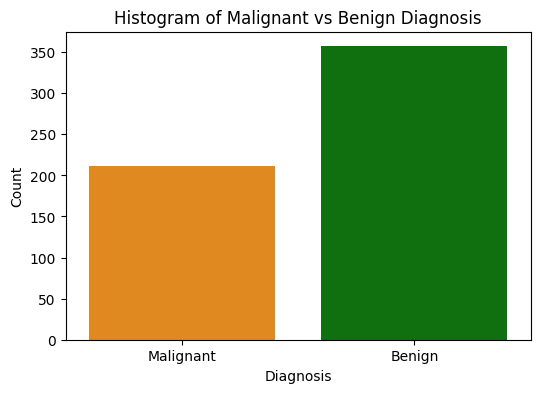

In [5]:
# Create a Histogram to show the Class Distribution
malignant_count = len(breast_cancer[breast_cancer["diagnosis"] == "M"])
benign_count = len(breast_cancer[breast_cancer["diagnosis"] == "B"])
print(f"Malignant Cases: {malignant_count}, {malignant_count/len(breast_cancer)*100:.2f} %")
print(f"Benign Cases: {benign_count}, {benign_count/len(breast_cancer)*100:.2f} %")

plt.figure(figsize=(6,4))
sns.countplot(x = 'diagnosis', 
              data=breast_cancer, 
              
              hue='diagnosis', 
              palette={'M': 'darkorange', 'B': 'green'})
plt.title("Histogram of Malignant vs Benign Diagnosis")
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks = ['M', 'B'], labels=['Malignant', 'Benign'])
plt.show()

In [6]:
# Change the target column (diagnosis) into binary
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M': 1, 'B': 0})

### **2. Exploratory Data Analysis (EDA)**

The non-useful features identified in the last step were removed from the dataset, then the data was split into training (70%) and testing sets (30%) to ensure that model preparation will not interfere with generalizability scores and testing results. 

The summary statistics for the training set do not indicate severe variation for most features, and standard deviation is consistently lower than the mean, suggesting variation is controlled. Notably, **"area"** shows more extreme variation in the standard error perspective and this may indicate outliers. 

The heatmap shows that features from different perspectives are not always correlated. However, features for the **"perimeter"**, **"radius"** and **"area"** (regardless of the perspective) are highly correlated (>0.9), these attributes are too similar and redundant to keep them all. Simularly, features for **"concave points"**, **"concavity"** and **"compactness"** also have high correlation (>0.8), these attributes are also very simular. To avoid the risk of multicolinearity, we will filter for one the features in each of these groups.

The correlation between features are target was isolated and shown in a table. Features associeted from the worst and mean perspective provide the strongest positive correlation with the target feature. In particualr, **"perimeter"**, **"concave points"**, **"radius"** and **"area"** (all from the worst perspective) have the highest scores. In addition, the random forest classifier model was used to illustrate feature importance. The top features were **"area"**, **"radius"** and **"concave points"** (all from the worst perspective), while features from the standard error perspective were again rated lowly. Given these insights, the model will be filtered to contain only the worst and mean features. To address the correlations observed in the heatmap above, the dataset will be removed of values in **"radius"** and **"perimeter"** but will maintain **"area"** (the feature with the highest feature importance and good correlation to target). For the same reasons, the feature for **"concave points"** will be kept in the dataset while **"concavity"** and **"compactness"** will be removed. 

In [7]:
# Clean the Dataset (remove unneeded columns)
breast_cancer = breast_cancer.drop(columns = ["id", "Unnamed: 32"])

In [8]:
# Split the dataset into training and testing sets
train, test = train_test_split(breast_cancer, train_size = 0.7, random_state=123)

In [9]:
# Show the summary statistics 
mean = train.filter(like="_mean").describe()
mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.144759,19.403593,92.078266,655.813065,0.095989,0.104524,0.089133,0.049081,0.181156,0.062798
std,3.496451,4.458139,24.040299,344.815080,0.013831,0.052519,0.080020,0.038360,0.028975,0.007392
min,7.691000,10.380000,47.920000,170.400000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960
25%,11.602500,16.187500,74.385000,412.525000,0.085977,0.066090,0.029950,0.020715,0.160300,0.057563
50%,13.515000,18.900000,87.295000,561.700000,0.095150,0.093020,0.062650,0.033455,0.178300,0.061400
75%,16.027500,21.892500,105.000000,796.650000,0.104575,0.129700,0.122400,0.073850,0.196000,0.066195
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


In [10]:
worst = train.filter(like="_worst").describe()
worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,16.256231,25.682789,107.218894,878.099246,0.130873,0.249739,0.267899,0.114053,0.287404,0.083154
std,4.806987,6.260433,33.381057,564.898936,0.022250,0.147355,0.204800,0.064374,0.062331,0.016930
min,8.678000,12.490000,54.490000,223.600000,0.084090,0.043270,0.000000,0.000000,0.156500,0.055040
25%,12.917500,21.120000,83.687500,509.300000,0.114725,0.147350,0.116475,0.064943,0.247150,0.070642
50%,15.020000,25.375000,97.980000,696.050000,0.129800,0.211800,0.224800,0.097660,0.279900,0.079590
75%,18.797500,29.425000,126.600000,1080.500000,0.143350,0.328975,0.379200,0.160850,0.313275,0.091525
max,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.663800,0.173000


In [11]:
se = train.filter(like="_se").describe()
se

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.411315,1.240581,2.914731,40.693975,0.007085,0.026116,0.033084,0.012195,0.020782,0.003895
std,0.269214,0.554353,1.954773,43.368409,0.003098,0.018071,0.033274,0.006490,0.008245,0.002870
min,0.111500,0.360200,0.757000,6.802000,0.002667,0.003012,0.000000,0.000000,0.007882,0.000895
25%,0.231575,0.841700,1.603000,17.872500,0.005213,0.013710,0.014732,0.007910,0.015003,0.002268
50%,0.328050,1.152500,2.327500,24.650000,0.006329,0.020700,0.026245,0.011215,0.019080,0.003236
75%,0.514725,1.499750,3.492750,48.002500,0.008200,0.032933,0.041955,0.015205,0.023977,0.004571
max,2.547000,3.896000,18.650000,542.200000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840


<function matplotlib.pyplot.show(close=None, block=None)>

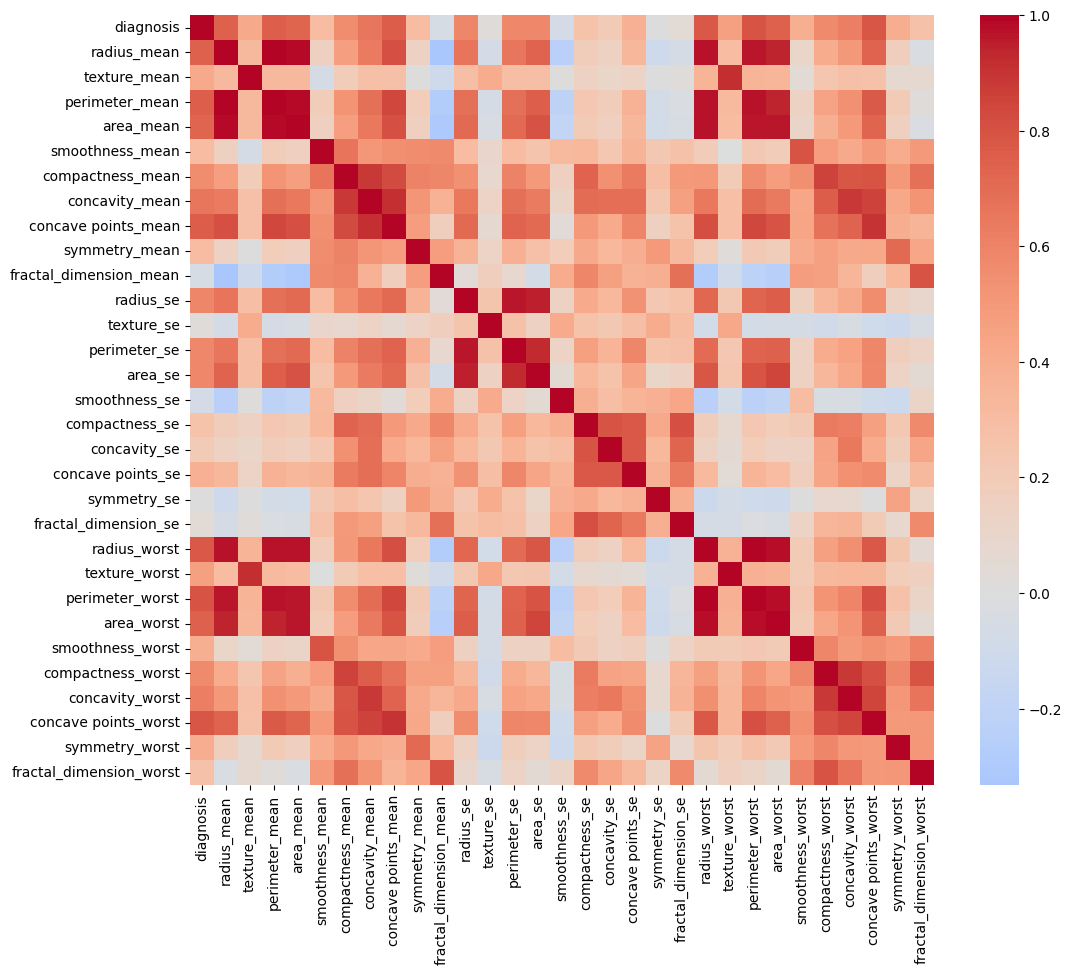

In [12]:
# Visualize a Heatmap of all the features
plt.figure(figsize=(12,10))
c = train.corr()
sns.heatmap(c,cmap="coolwarm",center=0)
plt.show

In [13]:
# Calculate the correlation between each feature and the target
X_train_corr = train.copy()
pd.DataFrame(X_train_corr.corr()['diagnosis'].sort_values(ascending=False))

,diagnosis
diagnosis,1.000000
perimeter_worst,0.786728
concave points_worst,0.784712
radius_worst,0.781348
concave points_mean,0.763253
perimeter_mean,0.753589
radius_mean,0.741760
area_worst,0.740486
area_mean,0.728190
concavity_mean,0.659802


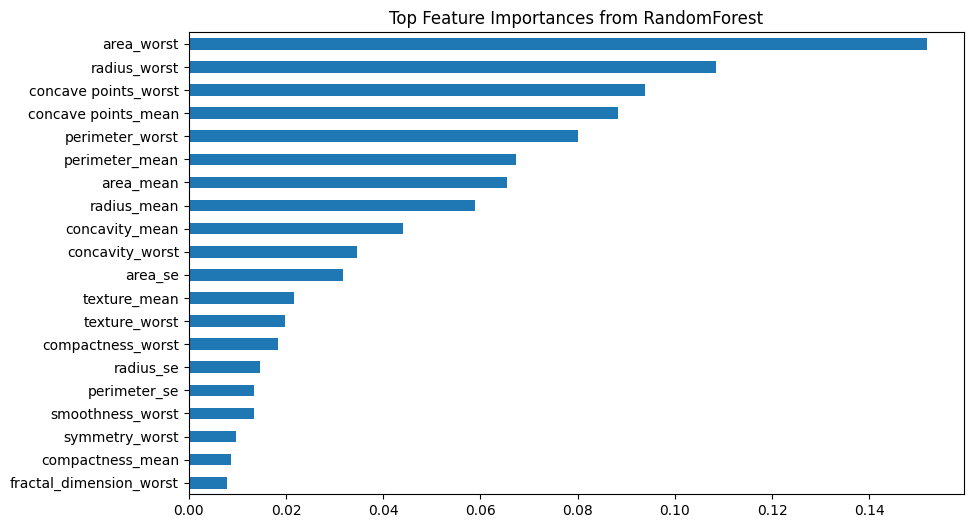

In [14]:
# Use RandomForest to obtain feature importance
x = train.drop(columns = "diagnosis")
y= train["diagnosis"]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y)

importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances.head(20).plot(kind='barh')
plt.title('Top Feature Importances from RandomForest')
plt.gca().invert_yaxis()
plt.show()

### **3. Feature Engineering**

As documented in EDA, the features associated with standard error perspective is removed from the dataset, while worst and mean features are retained. Features for perimeter, concavity, radius and compactness are also filtered out. This cleaning is performed separately for the training and testing sets.

In [15]:
# Filter training dataset (extract specific feature columns)
train_mean = train.filter(like = "_mean")
train_diagnosis = train["diagnosis"]
train_worst = train.filter(like = "_worst")

train_combined = pd.concat([train_mean, train_worst], axis=1)
train_combined["diagnosis"] = train["diagnosis"]

In [16]:
# Filter training and testing dataset (remove specific feature columns)
cols_to_drop = train_combined.filter(like="perimeter_").columns.tolist()
cols_to_drop += train_combined.filter(like="concavity_").columns.tolist()
cols_to_drop += train_combined.filter(like="radius_").columns.tolist()
cols_to_drop += train_combined.filter(like="compactness_").columns.tolist()

train_filtered = train_combined.drop(columns = cols_to_drop)
test_filtered = test[train_filtered.columns]

### **4. Preprocessing and Column Transformer**

Train and test data were separated into features (X) and the target (y). Also, a new function ('mean_std_cross_val_scores') was designed to retrieve the mean + std scores on the given model and datasets, this was created to format the results in downstream analysis. 

The preprocessor was created using ColumnTransformer. From the EDA and intial observations, the dataset was determined to not require any transformers apart from StandardScaler to make the features comprable, which is included in the preprocessor.

In [17]:
# Separate target data (y) and the rest of the features (X)
X_train = train_filtered.drop(columns=['diagnosis'])
y_train = train_filtered['diagnosis']

X_test = test_filtered.drop(columns=['diagnosis'])
y_test = test_filtered['diagnosis']

In [18]:
# Dict to store results
results = {}

In [19]:
# Function to calculate the mean values of score data
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):

    '''Input model, training features (X) and target features (y)'''
    '''Calculates mean and std of each score (recall, f1, precision)'''
    '''Outputs a series containing these results'''

    scr = cross_validate(model, X_train, y_train, cv=10, return_train_score=True, scoring=("f1", "precision", "recall"), **kwargs)

    result = {}

    result = {
        "Test Score (f1)" : f"{scr['test_f1'].mean():.2f} +/- {scr['test_f1'].std():.3f}",
        "Train Score (f1)" : f"{scr['train_f1'].mean():.2f} +/- {scr['train_f1'].std():.3f}",

        "Test Score (Precision)" : f"{scr['test_precision'].mean():.2f} +/- {scr['test_precision'].std():.3f}",
        "Train Score (Precision)" : f"{scr['train_precision'].mean():.2f} +/- {scr['train_precision'].std():.3f}",

        "Test Score (Recall)" : f"{scr['test_recall'].mean():.2f} +/- {scr['test_recall'].std():.3f}",
        "Train Score (Recall)" : f"{scr['train_recall'].mean():.2f} +/- {scr['train_recall'].std():.3f}"
    }

    return result

In [20]:
# Create Preprocessor to standardize data
preprocessor = make_column_transformer(
    (StandardScaler(), X_train.columns),
    remainder='passthrough' 
)

### **5. Baseline Model**

The baseline model with DummyClassifier demonstrated poor results (<0.50) in all scoring metrics. Future models should aim to perform better than 0.48 in recall and 0.37 in precision.

In [21]:
# Create and test Dummy model
dummy_pipe = make_pipeline(preprocessor, DummyClassifier(strategy="uniform"))
dum_score = mean_std_cross_val_scores(dummy_pipe, X_train, y_train)

In [22]:
# Visualize results of Dummy model
results["Dummy Classifier"] = dum_score
pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036


### **6. Linear Model**

A logistic regression model was applied to the training data with hyperparameter tuning of C. The best model (C = 100) demonstrated strong recall (0.97), precision (0.96), and F1 score (0.96), representing a significant improvement over the dummy classifier (scores increased by approximately 50%). The model performed similarly across training and test cross-validation, showing no indication of overfitting.

In [23]:
# Create dict to hold the results, and the C hyperparamete values
lr_scores_dict = {
    "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "mean_train_scores" : list(),
    "mean_cv_scores" : list()
}

In [24]:
for C in lr_scores_dict["C"]:
    lr = LogisticRegression(C=C, max_iter=1000, random_state=123)
    pipe_lr = make_pipeline(preprocessor, lr)
    score = mean_std_cross_val_scores(pipe_lr, X_train, y_train)
    
    lr_scores_dict["mean_train_scores"].append(score["Train Score (Recall)"])
    lr_scores_dict["mean_cv_scores"].append(score["Test Score (Recall)"])

In [25]:
pd.DataFrame(lr_scores_dict)

,C,mean_train_scores,mean_cv_scores
0,0.001,0.42 +/- 0.015,0.42 +/- 0.105
1,0.010,0.83 +/- 0.006,0.82 +/- 0.082
2,0.100,0.94 +/- 0.006,0.94 +/- 0.058
3,1.000,0.95 +/- 0.006,0.95 +/- 0.055
4,10.000,0.96 +/- 0.007,0.94 +/- 0.061
5,100.000,0.97 +/- 0.005,0.97 +/- 0.056
6,1000.000,0.96 +/- 0.004,0.96 +/- 0.055


In [26]:
# add linear reg. with best C parameter to the main results table
pipe_lr_best = make_pipeline(preprocessor, LogisticRegression(C = 100.000, max_iter=1000, random_state=123))
lr_score = mean_std_cross_val_scores(pipe_lr_best, X_train, y_train)

In [27]:
results["Logistic Reg. (C=100)"] = lr_score
pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036
Logistic Reg. (C=100),0.96 +/- 0.037,0.97 +/- 0.004,0.96 +/- 0.041,0.98 +/- 0.005,0.97 +/- 0.056,0.97 +/- 0.005


### **7. Ensembles and SVM**

Several additional models were tested on the dataset, including Gradient Boosting, Random Forest, SVM with an RBF kernel, and CatBoost (all without hyperparameter tuning). Both Random Forest and Gradient Boosting achieved perfect training scores (1.0) and high test performance, though the perfect results on training data raises concerns about potential overfitting. The CatBoost model demonstrated strong recall (training: 0.97, test: 0.93), though it showed signs of overfitting in terms of precision. The SVM RBF model exhibited high scores in precision (0.98) and recall on the test set (0.94). Overall, CatBoost provided the strongest recall performance, but still slightly underperformed Logistic Regression. Next steps will focus on feature selection and hyperparameter optimization, particularly for CatBoost and Logistic Regression, to balance precision and recall.

In [28]:
# maybe try without the gamme thing

models = {
    "Gradient Boosting" : GradientBoostingClassifier(random_state=123),
    "Random Forest" : RandomForestClassifier(n_jobs=-1, random_state=123),
    "Catboost" : CatBoostClassifier(random_state=123, verbose=0, iterations=100),
    "SVM RBF" : SVC(random_state=123, kernel="rbf")
}

In [29]:
for m in models : 
    new_pipe = make_pipeline(preprocessor, models[m])
    score = mean_std_cross_val_scores(new_pipe, X_train, y_train)
    
    results[f"{m}"] = score

pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036
Logistic Reg. (C=100),0.96 +/- 0.037,0.97 +/- 0.004,0.96 +/- 0.041,0.98 +/- 0.005,0.97 +/- 0.056,0.97 +/- 0.005
Gradient Boosting,0.96 +/- 0.031,1.00 +/- 0.000,0.99 +/- 0.019,1.00 +/- 0.000,0.94 +/- 0.059,1.00 +/- 0.000
Random Forest,0.95 +/- 0.033,1.00 +/- 0.000,0.97 +/- 0.035,1.00 +/- 0.000,0.93 +/- 0.044,1.00 +/- 0.000
Catboost,0.95 +/- 0.029,0.99 +/- 0.004,0.97 +/- 0.041,1.00 +/- 0.000,0.93 +/- 0.054,0.97 +/- 0.007
SVM RBF,0.96 +/- 0.028,0.97 +/- 0.004,0.98 +/- 0.031,0.98 +/- 0.007,0.94 +/- 0.058,0.95 +/- 0.007


In [30]:
# Remove model results that will not be tuned
del results["Random Forest"]
del results["Gradient Boosting"]

### **8. Feature Selection**

Recursive Feature Elimination with Cross-Validation (RFECV) was used with a linear logistic regression model to assess feature importance. This technique identified **'symmetry_mean'** and **'fractal_dimension_worst'** as the least important features, suggesting they do not significantly contribute to the target output. The remaining features were found to contribute equally and meaningfully to the model.

After applying RFECV, all models showed only minor negative changes: recall slightly decreased for both CatBoost and Logistic Regression, while precision slightly increased. The SVM RBF model showed no change in recall and a slight decrease in precision. CatBoost continued to overfit on the training set. Overall, feature selection did not improve model performance and will not be pursued further.

In [31]:
rfe_cv = RFECV(LogisticRegression(max_iter=2000), cv=10)
rfe_cv_pipe = make_pipeline(preprocessor, rfe_cv)
rfe_cv_pipe.fit(X_train, y_train)

#print(rfe_cv.support_)
feature_names = preprocessor.get_feature_names_out()
#print(feature_names[rfe_cv.support_])

ranking_df = pd.DataFrame({
    'feature': feature_names,
    'rank': rfe_cv.ranking_,
    'selected': rfe_cv.support_
})

pd.DataFrame(ranking_df)

,feature,rank,selected
0,standardscaler__texture_mean,1,True
1,standardscaler__area_mean,1,True
2,standardscaler__smoothness_mean,1,True
3,standardscaler__concave points_mean,1,True
4,standardscaler__symmetry_mean,2,False
5,standardscaler__fractal_dimension_mean,1,True
6,standardscaler__texture_worst,1,True
7,standardscaler__area_worst,1,True
8,standardscaler__smoothness_worst,1,True
9,standardscaler__concave points_worst,1,True


In [32]:
rfe_catboost_pipe = make_pipeline(preprocessor, 
                            rfe_cv,
                            models["Catboost"])

score = mean_std_cross_val_scores(rfe_catboost_pipe, X_train, y_train)

results["RFECV + Catboost"] = score

In [33]:
rfe_svm_pipe = make_pipeline(preprocessor, 
                            rfe_cv,
                            models["SVM RBF"])

score = mean_std_cross_val_scores(rfe_svm_pipe, X_train, y_train)

results["RFECV + SVM RBF"] = score

In [34]:
rfe_lr_pipe = make_pipeline(preprocessor, 
                            rfe_cv,
                            LogisticRegression(C=100.0, max_iter=1000, random_state=123))

score = mean_std_cross_val_scores(rfe_lr_pipe, X_train, y_train)

results["RFECV + Logistic Reg."] = score

In [35]:
pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036
Logistic Reg. (C=100),0.96 +/- 0.037,0.97 +/- 0.004,0.96 +/- 0.041,0.98 +/- 0.005,0.97 +/- 0.056,0.97 +/- 0.005
Catboost,0.95 +/- 0.029,0.99 +/- 0.004,0.97 +/- 0.041,1.00 +/- 0.000,0.93 +/- 0.054,0.97 +/- 0.007
SVM RBF,0.96 +/- 0.028,0.97 +/- 0.004,0.98 +/- 0.031,0.98 +/- 0.007,0.94 +/- 0.058,0.95 +/- 0.007
RFECV + Catboost,0.94 +/- 0.038,0.98 +/- 0.003,0.96 +/- 0.053,1.00 +/- 0.003,0.92 +/- 0.049,0.97 +/- 0.004
RFECV + SVM RBF,0.94 +/- 0.040,0.96 +/- 0.006,0.95 +/- 0.052,0.98 +/- 0.007,0.94 +/- 0.058,0.95 +/- 0.007
RFECV + Logistic Reg.,0.96 +/- 0.030,0.97 +/- 0.004,0.97 +/- 0.033,0.98 +/- 0.005,0.96 +/- 0.055,0.97 +/- 0.005


In [36]:
# Remove model results that will not be tuned
del results["RFECV + Catboost"]
del results["RFECV + Logistic Reg."]
del results["RFECV + SVM RBF"]

### **9. Hyperparameter Optimization**

Hyperparameter optimization improved recall for CatBoost (from 0.93 to 0.96) and SVM RBF (from 0.94 to 0.95). Precision scores remained largely the same, though SVM RBF experienced a slight decline. Both models showed improvements in F1 score. However, CatBoost still demonstrated overfitting on the training set, limiting the generalizability of its results.

In [37]:
catboost_param_grid = {
    "catboostclassifier__depth": [4, 6, 8, 10],
    "catboostclassifier__learning_rate": [0.1, 0.15, 0.2],
    "catboostclassifier__iterations": [100, 300, 500],
    "catboostclassifier__l2_leaf_reg": [5, 7, 8, 9],
}

svm_param_grid = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": ["scale", "auto", 0.01, 0.001, 0.0001],
}

In [38]:
catboost_search = RandomizedSearchCV(
    make_pipeline(preprocessor, CatBoostClassifier(random_state=123, verbose=0)),
    param_distributions=catboost_param_grid,
    scoring = ("recall", "f1", "precision"),
    cv=5,
    refit="recall",
    random_state=123,
    return_train_score=True,
    n_jobs=-1
)

In [39]:
svm_search = RandomizedSearchCV(
    make_pipeline(preprocessor, SVC(random_state=123, kernel="rbf", verbose=0)),
    param_distributions=svm_param_grid,
    scoring = ("recall", "f1", "precision"),
    cv=5,
    refit="recall",
    random_state=123,
    return_train_score=True,
    n_jobs=-1
)

In [40]:
catboost_search.fit(X_train, y_train)

,estimator,Pipeline(step...16FEDE3110>)])
,param_distributions,"{'catboostclassifier__depth': [4, 6, ...], 'catboostclassifier__iterations': [100, 300, ...], 'catboostclassifier__l2_leaf_reg': [5, 7, ...], 'catboostclassifier__learning_rate': [0.1, 0.15, ...]}"
,n_iter,10
,scoring,"('recall', ...)"
,n_jobs,-1
,refit,'recall'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [41]:
svm_search.fit(X_train,y_train)

,estimator,Pipeline(step... verbose=0))])
,param_distributions,"{'svc__C': [0.1, 1, ...], 'svc__gamma': ['scale', 'auto', ...]}"
,n_iter,10
,scoring,"('recall', ...)"
,n_jobs,-1
,refit,'recall'
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,123
,error_score,nan


In [42]:
# show best results for catboost
pd.DataFrame(catboost_search.cv_results_)[["mean_test_recall",
                                           "mean_test_f1",
                                           "mean_test_precision"]].iloc[[catboost_search.best_index_]]

,mean_test_recall,mean_test_f1,mean_test_precision
4,0.958374,0.961505,0.96522


In [43]:
# show best results for svm
pd.DataFrame(svm_search.cv_results_)[["mean_test_recall",
                                           "mean_test_f1",
                                           "mean_test_precision"]].iloc[[svm_search.best_index_]]

,mean_test_recall,mean_test_f1,mean_test_precision
7,0.951724,0.961384,0.972414


In [44]:
# print best parameters determined from hyperparameter tuning

print(f"{catboost_search.best_params_}")
print(f"{svm_search.best_params_}")

{'catboostclassifier__learning_rate': 0.2, 'catboostclassifier__l2_leaf_reg': 9, 'catboostclassifier__iterations': 500, 'catboostclassifier__depth': 4}
{'svc__gamma': 0.01, 'svc__C': 10}


In [45]:
optimized_catboost = make_pipeline(preprocessor, CatBoostClassifier(random_state=123, 
                                                                    verbose=0, 
                                                                    iterations=500,
                                                                    learning_rate=0.2, 
                                                                    l2_leaf_reg=9,
                                                                    depth=4))

results["Optimized Catboost"] = mean_std_cross_val_scores(optimized_catboost, X_train, y_train)
pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036
Logistic Reg. (C=100),0.96 +/- 0.037,0.97 +/- 0.004,0.96 +/- 0.041,0.98 +/- 0.005,0.97 +/- 0.056,0.97 +/- 0.005
Catboost,0.95 +/- 0.029,0.99 +/- 0.004,0.97 +/- 0.041,1.00 +/- 0.000,0.93 +/- 0.054,0.97 +/- 0.007
SVM RBF,0.96 +/- 0.028,0.97 +/- 0.004,0.98 +/- 0.031,0.98 +/- 0.007,0.94 +/- 0.058,0.95 +/- 0.007
Optimized Catboost,0.95 +/- 0.025,1.00 +/- 0.000,0.97 +/- 0.032,1.00 +/- 0.000,0.94 +/- 0.058,1.00 +/- 0.000


### **10. Interpretation and Feature Importance**
Based on the SHAP summary plot, the features with the strongest influence on logistic regression model predictions are **'area_worst'**, **'area_mean'**, and **'concave_points_mean'**. Interestingly, the area-related features show inverse effects: higher values of area_worst are associated with positive predictions (malignancy), while higher values of area_mean are linked to negative predictions. The feature concave_points_mean shares the same directionality as area_worst, but shows less horizontal spread in the SHAP plot, indicating a narrower range of impactful high values contributing to positive predictions.

In [46]:
X_train_enc = pd.DataFrame(
    data = preprocessor.transform(X_train),
    columns = feature_names,
    index = X_train.index
)

X_test_enc = pd.DataFrame(
    data = preprocessor.transform(X_test),
    columns = feature_names,
    index = X_test.index
)

In [47]:
best_lr_model = LogisticRegression(C = 100, max_iter=1000, random_state=123)
best_lr_model.fit(X_train_enc, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,100
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
explainer = shap.LinearExplainer(best_lr_model, X_train_enc)
train_shap_values = explainer.shap_values(X_train_enc)

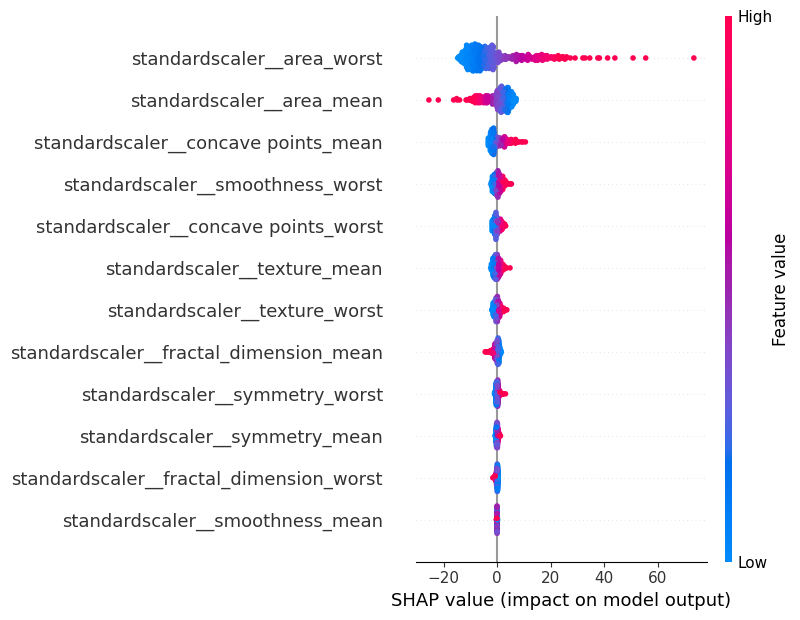

In [49]:
shap.summary_plot(train_shap_values, X_train_enc)

### **11. Final Results + Reflection**

The best-performing model overall was logistic regression with optimized hyperparameter C, which yielded strong precision, recall, and F1 scores. Unlike the ensemble models, logistic regression did not overfit the training data during cross-validation, suggesting it was the most generalizable method tested.

Final prediction results on unseen data confirmed the model’s strength, with recall at 0.99, precision at 1.0, and F1 score at 1.0. The confusion matrix supports these metrics, showing only a single false positive and all other cases correctly predicted. High precision and recall indicate that the model is well-tuned for correctly identifying positive cases.

Recall is particularly prioritized in this problem, as minimizing false negatives (i.e., incorrectly predicting benign when the case is actually malignant) is critical. Such errors could delay necessary treatment, posing a greater risk to patient outcomes.

In [50]:
pd.DataFrame(results).T

,Test Score (f1),Train Score (f1),Test Score (Precision),Train Score (Precision),Test Score (Recall),Train Score (Recall)
Dummy Classifier,0.42 +/- 0.088,0.41 +/- 0.025,0.35 +/- 0.068,0.36 +/- 0.022,0.54 +/- 0.128,0.48 +/- 0.036
Logistic Reg. (C=100),0.96 +/- 0.037,0.97 +/- 0.004,0.96 +/- 0.041,0.98 +/- 0.005,0.97 +/- 0.056,0.97 +/- 0.005
Catboost,0.95 +/- 0.029,0.99 +/- 0.004,0.97 +/- 0.041,1.00 +/- 0.000,0.93 +/- 0.054,0.97 +/- 0.007
SVM RBF,0.96 +/- 0.028,0.97 +/- 0.004,0.98 +/- 0.031,0.98 +/- 0.007,0.94 +/- 0.058,0.95 +/- 0.007
Optimized Catboost,0.95 +/- 0.025,1.00 +/- 0.000,0.97 +/- 0.032,1.00 +/- 0.000,0.94 +/- 0.058,1.00 +/- 0.000


In [51]:
test_pred = best_lr_model.predict(X_test_enc)

print("Final Test Results for Best Model : Logistic Regression")
print(f"Recall test_score {recall_score(y_test, test_pred)}")
print(f"Precision test_score {precision_score(y_test, test_pred)}")
print(f"f1 test_score {f1_score(y_test, test_pred)}")

Final Test Results for Best Model : Logistic Regression
Recall test_score 0.9852941176470589
Precision test_score 1.0
f1 test_score 0.9925925925925926


In [52]:
confusion_matrix(y_test, test_pred)

array([[103,   0],
       [  1,  67]])

### **12. Takeaways**


* Best Model: Logistic regression (C = 100) achieved the highest performance for breast cancer diagnosis using the Wisconsin Breast Cancer Dataset. It delivered strong precision and recall (both approximately 0.99) and offers the added benefit of model interpretability for clinical explainability.
* Limitations: This project relies on historical data, which may carry biases related to specific population groups. As a result, the model's generalizability in real-world applications may be limited or misleading.
* Key Features: The most influential features in prediction were related to cell nucleus characteristics — particularly area (both worst and mean) and concave points (mean), which had the strongest impact on the model's decisions.